In [1]:
# Libraries needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the load 
df = sns.load_dataset('titanic')

In [3]:
# Display the basic information about my data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Check for the missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
# Fill the missing values
# Fill in the age - Median, embarked - mode, deck - unkown
df['age'].fillna(df['age'].median(), inplace = True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace = True)
df['deck'].fillna('C', inplace = True)
df.drop(columns = ['who', 'adult_male', 'alive', 'class'], inplace = True) # Drop the redundant columns
df.head()

C:\Users\Learner\AppData\Local\Temp\ipykernel_11944\3831444972.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace = True)
C:\Users\Learner\AppData\Local\Temp\ipykernel_11944\3831444972.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,C,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,C,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,C,Southampton,True


# Univariate Analysis

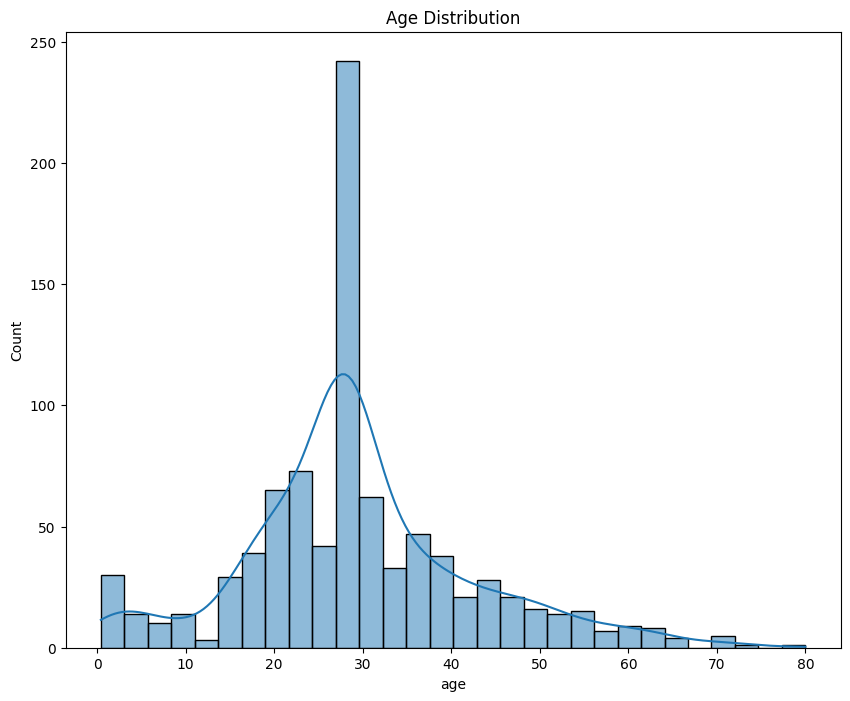

In [7]:
plt.figure(figsize = (10, 8))
sns.histplot(df['age'], bins = 30, kde = True)
plt.title("Age Distribution")
plt.show()

C:\Users\Learner\AppData\Local\Temp\ipykernel_11944\2812534648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'sex', data = df, palette = 'coolwarm')


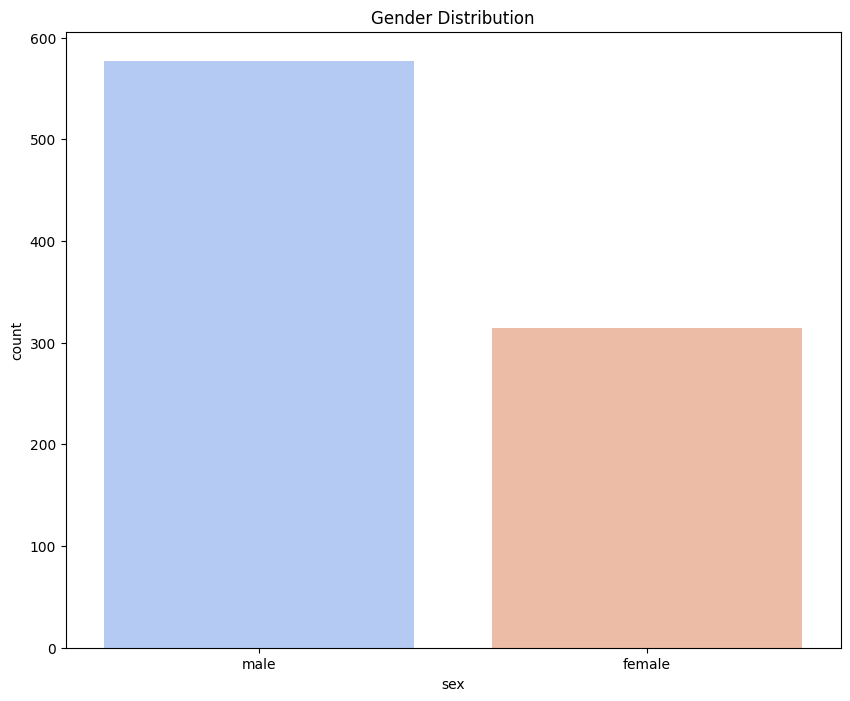

In [8]:
# Gender dis
plt.figure(figsize = (10, 8))
sns.countplot(x = 'sex', data = df, palette = 'coolwarm')
plt.title("Gender Distribution")
plt.show()

C:\Users\Learner\AppData\Local\Temp\ipykernel_11944\2646709230.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'pclass', data = df, palette = 'viridis')


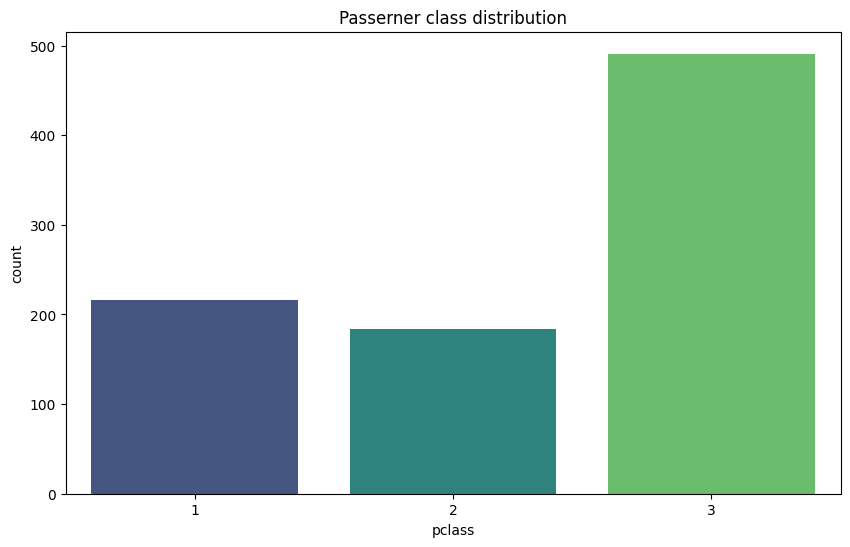

In [9]:
# passenger class distribution
plt.figure(figsize = (10, 6))
sns.countplot(x = 'pclass', data = df, palette = 'viridis')
plt.title("Passerner class distribution")
plt.show()

# Bivariate analysis

C:\Users\Learner\AppData\Local\Temp\ipykernel_11944\1295146082.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'pclass', y = 'age', data = df, palette = 'coolwarm')


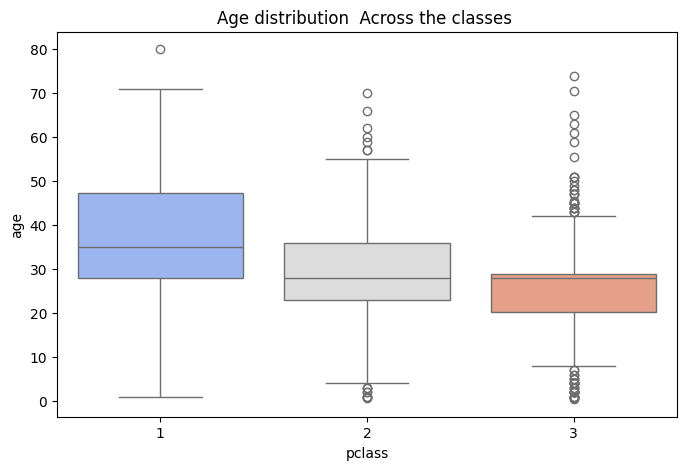

In [10]:
# Age distr. per the classes 
plt.figure(figsize = (8, 5))
sns.boxplot(x = 'pclass', y = 'age', data = df, palette = 'coolwarm')
plt.title("Age distribution  Across the classes ")
plt.show()

C:\Users\Learner\AppData\Local\Temp\ipykernel_11944\2373765260.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'sex', y = 'survived', data = df, palette = 'rocket')


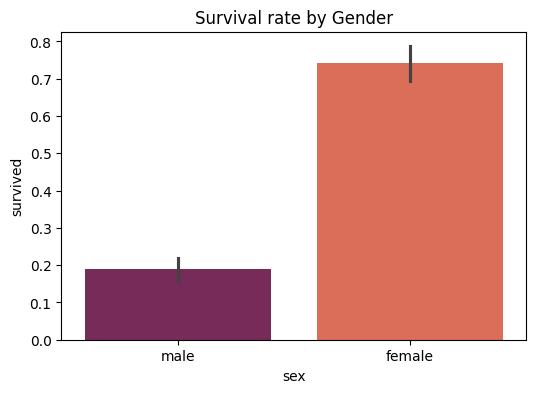

In [11]:
# Survival rate by gender
plt.figure(figsize = (6, 4))
sns.barplot(x = 'sex', y = 'survived', data = df, palette = 'rocket')
plt.title("Survival rate by Gender")
plt.show()

# multivariate analysis

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   deck         891 non-null    category
 9   embark_town  889 non-null    object  
 10  alone        891 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(4), object(3)
memory usage: 64.9+ KB


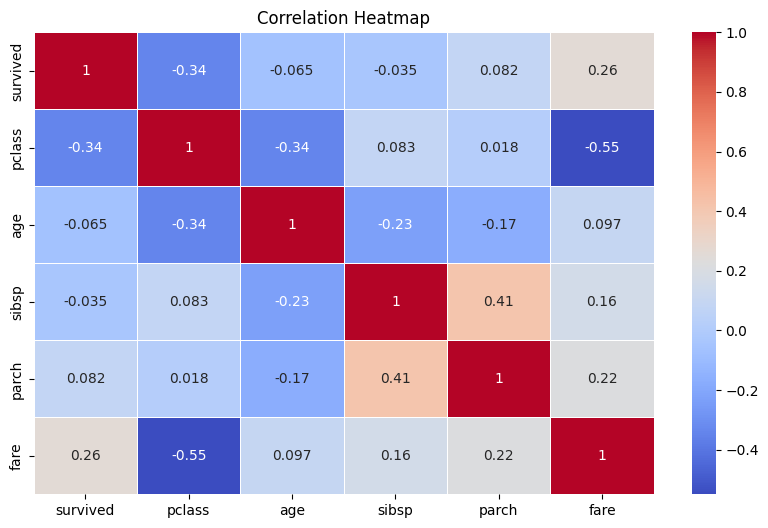

In [13]:
df2 = df[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']]
plt.figure(figsize = (10, 6))
sns.heatmap(df2.corr(), annot = True, cmap = 'coolwarm', linewidth = 0.5)
plt.title("Correlation Heatmap")
plt.show()
          